<a href="https://colab.research.google.com/github/anirudh-bukka/DataAnalysis-SupervisedML/blob/main/SocialNetworkAds_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\banirudh\Desktop\Material\Social_Network_Ads.csv")

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Attributes

In [ ]:
df.shape

(400, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.nlargest(len(df.index), df.iloc[:])

,Age,EstimatedSalary,Purchased
215,60,108000,1
223,60,102000,1
371,60,83000,1
370,60,46000,1
393,60,42000,1
...,...,...,...
165,18,86000,0
14,18,82000,0
141,18,68000,0
76,18,52000,0


In [ ]:
df.nsmallest(len(df.index), df.iloc[:])

,Age,EstimatedSalary,Purchased
51,18,44000,0
76,18,52000,0
141,18,68000,0
14,18,82000,0
165,18,86000,0
...,...,...,...
393,60,42000,1
370,60,46000,1
371,60,83000,1
223,60,102000,1


In [ ]:
df.nunique()

Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

## Central imputations

In [ ]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

In [ ]:
df.median()

Age                   37.0
EstimatedSalary    70000.0
Purchased              0.0
dtype: float64

In [ ]:
df.mode()

,Age,EstimatedSalary,Purchased
0,35,72000,0


In [ ]:
df.skew()

Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

In [ ]:
df.skew(1)

0      1.732045
1      1.732033
2      1.732049
3      1.732049
4      1.732050
         ...   
395    1.732044
396    1.732023
397    1.732016
398    1.732044
399    1.732040
Length: 400, dtype: float64

In [ ]:
df.quantile(0.25)

Age                   29.75
EstimatedSalary    43000.00
Purchased              0.00
Name: 0.25, dtype: float64

In [ ]:
df.quantile()

Age                   37.0
EstimatedSalary    70000.0
Purchased              0.0
Name: 0.5, dtype: float64

In [ ]:
df.quantile(0.75)

Age                   46.0
EstimatedSalary    88000.0
Purchased              1.0
Name: 0.75, dtype: float64

#### Split independent and dependent variables.

In [ ]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [ ]:
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

### Split data into test and train

`random state`: Used for reproducing the same problem everytime the program is run. If not used, everytime the program is run, different train and test sets are made and we can not find out or assess the error/problem. <br>
<br>
Other parameters: The 1-D arrays, `test_size`, `train_size`, `shuffle`, `stratify`.
<br>
<br>
`shuffle`: To shuffle the data before splitting. <br>
`stratify`: To split the data in a stratified fasion (strata or layers).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print(X_train)

[[    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  51000]
 [    46  74000]
 [    18  82000]
 [    37  33000]
 [    35  53000]
 [    28  59000]
 [    37  71000]
 [    18  44000]
 [    38  61000]
 [    35  65000]
 [    31  66000]
 [    47  25000]
 [    42 104000]
 [    19  19000]
 [    21  72000]
 [    28  32000]
 [    52 150000]
 [    53 104000]
 [    25  80000]
 [    26  72000]
 [    26  15000]
 [    40 142000]
 [    35  38000]
 [    57 122000]
 [    41  87000]
 [    24  89000]
 [    37  52000]
 [    35 108000]
 [    32 100000]
 [    35 147000]
 [    19  26000]
 [    46  82000]
 [    47 105000]
 [    45  45000]
 [    38  51000]
 [    37  93000]
 [    29  43000]
 [    41  30000]
 [    40  60000]
 [    27  88000]
 [    27  9000

In [ ]:
print(X_test)

[[    36  33000]
 [    39  61000]
 [    36 118000]
 [    39 122000]
 [    26 118000]
 [    38  65000]
 [    20  36000]
 [    49  89000]
 [    31  18000]
 [    48 141000]
 [    34  72000]
 [    39  73000]
 [    35  72000]
 [    48 131000]
 [    53  82000]
 [    56 133000]
 [    60  83000]
 [    27  58000]
 [    28  87000]
 [    60 102000]
 [    40  75000]
 [    50  88000]
 [    44 139000]
 [    47  43000]
 [    45  26000]
 [    26  15000]
 [    58  47000]
 [    49  74000]
 [    53  34000]
 [    52 114000]
 [    39  42000]
 [    19  76000]
 [    18  86000]
 [    57  74000]
 [    27  84000]
 [    30  80000]
 [    22  18000]
 [    32  86000]
 [    50  20000]
 [    19  25000]
 [    47 144000]
 [    58 101000]
 [    34 115000]
 [    23  66000]
 [    56  60000]
 [    31 118000]
 [    48  35000]
 [    47 113000]
 [    39  79000]
 [    52  38000]
 [    24  58000]
 [    37  53000]
 [    42  80000]
 [    46  28000]
 [    42  73000]
 [    37  62000]
 [    60  42000]
 [    36  52000]
 [    58  9500

In [ ]:
print(y_train)

[0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0]


In [ ]:
print(y_test)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1]


## Feature Scaling
<br>
Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation. 
<br>
The standard scaling is calculated as: 
<br>
z = (x - u) / s
<br>
- z : scaled data. <br>
- x : to be scaled data. <br>
- u : the mean of the training samples. <br>
- s : the standard deviation of the training samples.
<br>
<br>
Feature scaling is used to bring the values of the selected columns to the same scale. <br>
Used to normalise the range of **independent variables** of features of data.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# The standard scaler should be fit into and transform the TRAIN Data only. 
X_train = sc.fit_transform(X_train)

# Standard scaler or any method is NOT to be fit into the TEST Data
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-9.79100420e-01 -1.11059025e+00]
 [-2.03575335e-01  5.66967998e-02]
 [ 1.15359356e+00 -1.19813678e+00]
 [-2.03575335e-01  6.40340327e-01]
 [-9.69406357e-03  1.73425505e-01]
 [-4.94397242e-01  1.39907691e+00]
 [-1.06634699e-01  1.73425505e-01]
 [-1.65768487e+00  4.94429445e-01]
 [ 8.72465721e-02 -5.56128904e-01]
 [ 1.15359356e+00 -9.64679373e-01]
 [ 2.81127843e-01 -1.18396258e-01]
 [-9.69406357e-03  2.31789858e-01]
 [ 2.21994056e+00 -6.72857609e-01]
 [ 1.05665293e+00  2.01190262e+00]
 [ 2.81127843e-01  5.66967998e-02]
 [-1.06634699e-01 -1.76760611e-01]
 [-1.07604106e+00  3.48518563e-01]
 [-3.97456606e-01 -1.11059025e+00]
 [ 3.78068479e-01 -5.26946727e-01]
 [ 8.62771657e-01  1.44243329e-01]
 [-1.85156614e+00  3.77700740e-01]
 [-9.69406357e-03 -1.05222590e+00]
 [-2.03575335e-01 -4.68582375e-01]
 [-8.82159785e-01 -2.93489316e-01]
 [-9.69406357e-03  5.66967998e-02]
 [-1.85156614e+00 -7.31221962e-01]
 [ 8.72465721e-02 -2.35124964e-01]
 [-2.03575335e-01 -1.18396258e-01]
 [-5.91337878e-01 -8

In [ ]:
print(X_test)

[[-0.1066347  -1.0522259 ]
 [ 0.18418721 -0.23512496]
 [-0.1066347   1.42825909]
 [ 0.18418721  1.54498779]
 [-1.07604106  1.42825909]
 [ 0.08724657 -0.11839626]
 [-1.65768487 -0.96467937]
 [ 1.15359356  0.58197597]
 [-0.59133788 -1.48995855]
 [ 1.05665293  2.09944914]
 [-0.30051597  0.08587898]
 [ 0.18418721  0.11506115]
 [-0.20357533  0.08587898]
 [ 1.05665293  1.80762738]
 [ 1.54135611  0.37770074]
 [ 1.83217801  1.86599173]
 [ 2.21994056  0.40688292]
 [-0.97910042 -0.32267149]
 [-0.88215978  0.52361162]
 [ 2.21994056  0.96134427]
 [ 0.28112784  0.17342551]
 [ 1.2505342   0.5527938 ]
 [ 0.66889039  2.04108479]
 [ 0.95971229 -0.76040414]
 [ 0.76583102 -1.25650114]
 [-1.07604106 -1.57750508]
 [ 2.02605929 -0.64367543]
 [ 1.15359356  0.14424333]
 [ 1.54135611 -1.02304373]
 [ 1.44441547  1.31153038]
 [ 0.18418721 -0.78958631]
 [-1.75462551  0.20260768]
 [-1.85156614  0.49442945]
 [ 1.92911865  0.14424333]
 [-0.97910042  0.43606509]
 [-0.68827851  0.31933639]
 [-1.4638036  -1.48995855]
 

# Train the Logistic Regression model on the train set: `X_train`, `y_train`

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state = 0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
print(X_train)

[[-9.79100420e-01 -1.11059025e+00]
 [-2.03575335e-01  5.66967998e-02]
 [ 1.15359356e+00 -1.19813678e+00]
 [-2.03575335e-01  6.40340327e-01]
 [-9.69406357e-03  1.73425505e-01]
 [-4.94397242e-01  1.39907691e+00]
 [-1.06634699e-01  1.73425505e-01]
 [-1.65768487e+00  4.94429445e-01]
 [ 8.72465721e-02 -5.56128904e-01]
 [ 1.15359356e+00 -9.64679373e-01]
 [ 2.81127843e-01 -1.18396258e-01]
 [-9.69406357e-03  2.31789858e-01]
 [ 2.21994056e+00 -6.72857609e-01]
 [ 1.05665293e+00  2.01190262e+00]
 [ 2.81127843e-01  5.66967998e-02]
 [-1.06634699e-01 -1.76760611e-01]
 [-1.07604106e+00  3.48518563e-01]
 [-3.97456606e-01 -1.11059025e+00]
 [ 3.78068479e-01 -5.26946727e-01]
 [ 8.62771657e-01  1.44243329e-01]
 [-1.85156614e+00  3.77700740e-01]
 [-9.69406357e-03 -1.05222590e+00]
 [-2.03575335e-01 -4.68582375e-01]
 [-8.82159785e-01 -2.93489316e-01]
 [-9.69406357e-03  5.66967998e-02]
 [-1.85156614e+00 -7.31221962e-01]
 [ 8.72465721e-02 -2.35124964e-01]
 [-2.03575335e-01 -1.18396258e-01]
 [-5.91337878e-01 -8

 [-6.88278513e-01 -5.85311080e-01]]


## Predicting a new result

In [ ]:
logreg.predict(sc.transform([[30, 87000]]))

array([0], dtype=int64)

## Predicting the test result

In [ ]:
y_pred = logreg.predict(X_test)

print(y_pred)

[0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_pred, y_test))
print()
print(accuracy_score(y_pred, y_test))

[[65 14]
 [ 7 34]]

0.825


# Plotting

While plotting a "Logistic Regression under ROC curve", we need to apply the `predict_proba` method on `X_test` <br>
<br>
**`predict_proba`**: <br>
    <ul> We used the predicted probabilities of the model assigning a value of 1 to the observation in question (X_test)</ul>
    <ul> This is because, to compute the ROC we do not merely want the prediction on the test set, but we want the probability that our `logreg` model outputs before using the threshold to predict the label.
<br>


[4.85809640e-02 2.38568655e-01 6.27509571e-01 7.93891700e-01
 1.56213361e-01 2.28493920e-01 1.68469570e-03 9.00195097e-01
 9.05067590e-03 9.83975254e-01 1.40372857e-01 3.39179728e-01
 1.69190652e-01 9.76017138e-01 9.42391781e-01 9.96146780e-01
 9.87649674e-01 1.91933773e-02 7.44581323e-02 9.94309016e-01
 4.10024492e-01 9.15218390e-01 9.58983979e-01 4.66462937e-01
 2.18360043e-01 2.66911943e-03 9.21233614e-01 8.29544898e-01
 6.94319412e-01 9.79967754e-01 1.25421483e-01 6.96406888e-03
 8.41324284e-03 9.66071579e-01 5.39436266e-02 8.57690000e-02
 1.25016850e-03 1.57362448e-01 3.97011646e-01 8.59959290e-04
 9.82364386e-01 9.90809822e-01 4.89127940e-01 1.11176759e-02
 9.27728290e-01 3.58342680e-01 4.39648612e-01 9.39626463e-01
 3.96479373e-01 6.82243074e-01 9.98854704e-03 1.26612453e-01
 5.70390298e-01 2.74449916e-01 4.98878897e-01 1.73495288e-01
 9.36743360e-01 1.00362474e-01 9.88267513e-01 9.25515735e-01
 6.54548319e-02 2.12500367e-02 6.71813101e-01 7.61185907e-02
 4.35370668e-01 8.595813

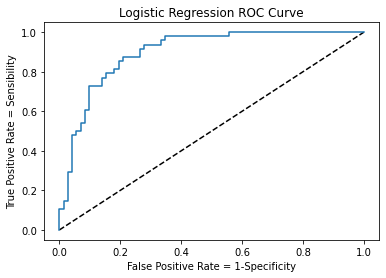

In [ ]:
# prediction_space = np.linspace(min(X_test), max(X_test))

from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:, 1] # Should return an array with 2 columns where each column contains the probabilities of the respective target values.

print(y_pred_prob)
print(y_pred_prob.shape)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) # actaul labels and predicted probabilities.
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate = 1-Specificity")
plt.ylabel("True Positive Rate = Sensibility")
plt.title("Logistic Regression ROC Curve")
plt.show()

## Visualise the Test results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


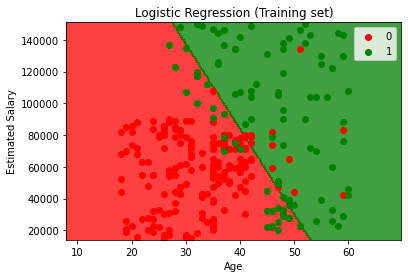

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
# Scales the data back to the original representation

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# np.meshgrid Return coordinate matrices from coordinate vectors

plt.contourf(X1, X2, logreg.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualise the Test results

# Predicting using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
linreg = LinearRegression()

XX = df[['Age', 'EstimatedSalary']].values
YY = df['Purchased']

linreg = linreg.fit(XX, YY)

Y_linPredict = linreg.predict(XX)
Y_R2 = linreg.score(XX, YY)

print(Y_linPredict)
print(Y_R2)

[-0.3322351   0.0965611  -0.05443645  0.02571788 -0.11403169  0.02954601
  0.12907739  0.51453649 -0.11927826  0.26882695  0.08720436 -0.01998328
 -0.04918989  0.00922333 -0.11762342  0.16688588  0.43442781  0.38513493
  0.41935169  0.47630083  0.36982241  0.52630293  0.52223839  0.36982241
  0.40021104  0.41528716  0.49903321  0.45356846  0.02524506 -0.01733718
  0.1970381   0.33196828 -0.29059848  0.00251269  0.15204617  0.12335801
  0.07406513  0.07477435  0.05657932 -0.07381351 -0.12740733  0.16211212
  0.43343654 -0.05538207  0.15563789 -0.22216496  0.05681573  0.01423348
  0.40399353  0.25446006 -0.14966689 -0.26309236  0.17837027  0.10804549
  0.02954601 -0.0616199  -0.11497731  0.13649724 -0.25638172  0.3882082
 -0.11592294  0.08744077 -0.04607097  0.39969259  0.97518541 -0.05013551
 -0.19943258  0.01517911 -0.08411587  0.17406932  0.06064386 -0.16880754
 -0.29036208  0.39945619  0.00922333  0.42218856 -0.23246732 -0.22192855
  0.16712228 -0.15396783  0.19344638  0.28702198 -0.